# **Hate Speech Detection using Social Media Comments**

***Importing the DataSet***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('youtoxic_english_1000.csv')
df2 = pd.read_csv("HateSpeechDatasetBalanced.csv")


In [ ]:
df1 = df1[["Text", "IsHatespeech"]]
df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)
df1.head(2)

<ipython-input-11-b8a2874d4bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)


,Text,IsHatespeech
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,0


In [ ]:
df2 = df2.rename(columns={'Content':"Text","Label":"IsHatespeech"})

In [ ]:
combined_df = pd.concat([df2, df1])

combined_df = combined_df.reset_index(drop=True)

combined_df.tail()

,Text,IsHatespeech
118977,I remember that they sent in the national defe...,0.0
118978,Stats don`t represent the problem. Race baitin...,1.0
118979,The quote from the mother... Wow that hit hard...,0.0
118980,this video is so racist,0.0
118981,"God, the narrator has such an annoying lisp.",0.0


In [ ]:
combined_df.groupby("IsHatespeech").count()

,Text
IsHatespeech,
0.0,79281
1.0,39700


In [ ]:
combined_df.to_csv("Final_Dataset.csv")

In [ ]:
df =  pd.read_csv("Final_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Text,IsHatespeech
0,0,denial of normal the con be asked to comment o...,1.0
1,1,just by being able to tweet this insufferable ...,1.0
2,2,that is retarded you too cute to be single tha...,1.0
3,3,thought of a real badass mongol style declarat...,1.0
4,4,afro american basho,1.0


# **Data Cleaning And EDA**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

Unnamed: 0      0
Text            0
IsHatespeech    1
dtype: int64


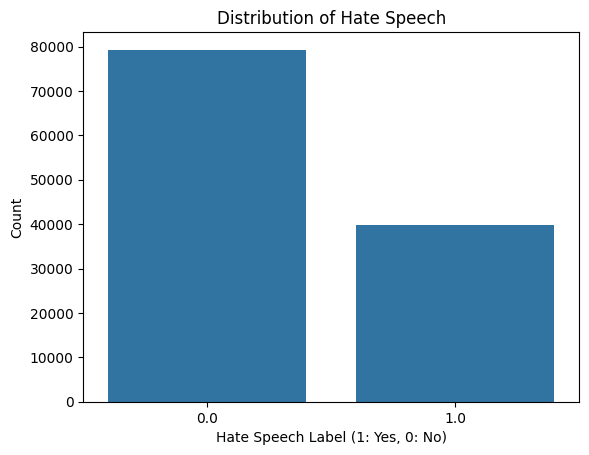

In [ ]:
# Visualize distribution of hate speech
sns.countplot(x='IsHatespeech', data=df)
plt.title("Distribution of Hate Speech")
plt.xlabel("Hate Speech Label (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

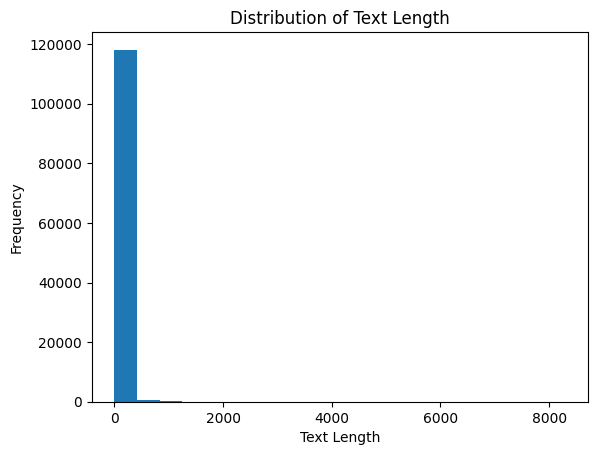

In [ ]:
# Analyze comment length
df['Text_length'] = df['Text'].apply(len)
plt.hist(df['Text_length'], bins=20)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118982 entries, 0 to 118981
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      118982 non-null  int64  
 1   Text            118982 non-null  object 
 2   IsHatespeech    118981 non-null  float64
 3   comment_length  118982 non-null  int64  
 4   Text_length     118982 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,IsHatespeech,comment_length,Text_length
count,118982.000000,118981.000000,118982.000000,118982.000000
mean,59490.500000,0.333667,95.526491,95.526491
std,34347.289202,0.471524,88.162967,88.162967
min,0.000000,0.000000,1.000000,1.000000
25%,29745.250000,0.000000,43.000000,43.000000
50%,59490.500000,0.000000,74.000000,74.000000
75%,89235.750000,1.000000,120.000000,120.000000
max,118981.000000,1.000000,8299.000000,8299.000000


# ***Finalized Tokenization and Embedding Technique***
**TF IDF**

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")
# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["Text"])

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(vectorizer.get_feature_names_out(), vectorizer.idf_): # Use 'vectorizer' instead of 'tfidf'
    print(ele1, ':', ele2)

Streaming output truncated to the last 5000 lines.
sakura : 9.04033948722042
salacious : 9.445804595328584
salad : 9.04033948722042
salads : 9.445804595328584
salary : 8.752657414768638
salazar : 9.04033948722042
sale : 7.836366682894484
salem : 8.752657414768638
sales : 8.347192306660475
salesman : 9.445804595328584
salford : 9.04033948722042
sali : 9.445804595328584
salient : 9.04033948722042
salinas : 9.445804595328584
salish : 9.445804595328584
saliva : 9.445804595328584
sallie : 9.445804595328584
sally : 9.445804595328584
salman : 9.445804595328584
salome : 9.445804595328584
salon : 9.04033948722042
salons : 9.445804595328584
salt : 7.836366682894484
salted : 9.445804595328584
saltine : 9.445804595328584
salts : 9.445804595328584
saltwater : 9.445804595328584
salute : 9.04033948722042
salutes : 9.445804595328584
salvador : 9.04033948722042
salvage : 9.04033948722042
salve : 9.445804595328584
salvini : 9.445804595328584
sam : 7.836366682894484
samantha : 9.04033948722042
samar : 9.

# **Hyper Tunning ML Models**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")
df['clean_text'] = df['clean_text'].fillna('')

In [ ]:
# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Define models and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']})
}


In [ ]:
# Perform hyperparameter tuning for each model
for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")

Tuning Logistic Regression...
Tuning Random Forest...
Tuning SVM...
Tuning Decision Tree...


In [ ]:

    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=5)
    random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [ ]:
 # Print best parameters and score
print(f"Best parameters for {model_name}: {random_search.best_params_}")
print(f"Best accuracy for {model_name}: {random_search.best_score_}")

Best parameters for Random Forest: {'n_estimators': 50, 'max_depth': None}
Best accuracy for Random Forest: 0.7451672894289668


# **Finalized ML Model**

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7943071965628357
Precision: 0.7744209466263847
Recall: 0.8286637931034483
F1-score: 0.8006246746486206
